In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import cv2
import dlib
import numpy as np
from fastai.vision import *

In [10]:
%mkdir data

In [ ]:
!unzip /content/data/data.zip

In [11]:
path = Path('/content/data1')

In [12]:
path.ls()

[PosixPath('/content/data1/train'),
 PosixPath('/content/data1/test'),
 PosixPath('/content/data1/valid')]

In [13]:
%mkdir data1

mkdir: cannot create directory ‘data1’: File exists


In [36]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train="train", valid='valid',
        ds_tfms=get_transforms(), num_workers=4,bs =64, size = 224).normalize(imagenet_stats)

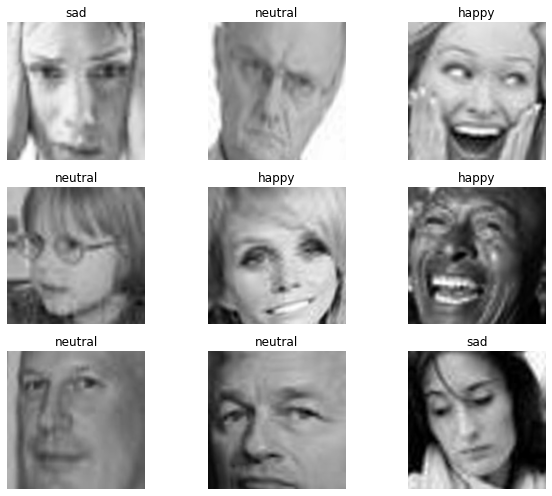

In [37]:
data.show_batch(rows=3, figsize=(9,7))


In [38]:
print(data.classes)
len(data.classes),data.c
len(data.valid_ds),len(data.train_ds)

['happy', 'neutral', 'sad']


(236, 588)

In [39]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)


In [41]:
learn.freeze_to(-1)

In [42]:
learn.fit_one_cycle(15,1e-2, div_factor=12, pct_start=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,1.616587,2.981651,0.372881,00:04
1,1.506274,2.298682,0.470339,00:04
2,1.379898,1.999102,0.483051,00:04
3,1.216516,2.051480,0.491525,00:04
4,1.076509,1.235989,0.644068,00:04
5,0.932226,1.250779,0.627119,00:04
6,0.835821,0.859663,0.728814,00:04
7,0.728668,0.753115,0.750000,00:04
8,0.639286,0.716682,0.762712,00:04
9,0.573544,0.703522,0.750000,00:04


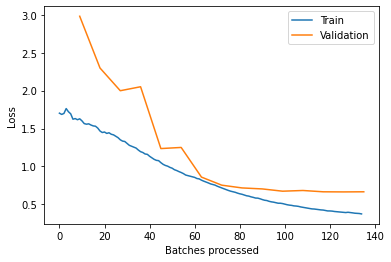

In [43]:
learn.recorder.plot_losses()

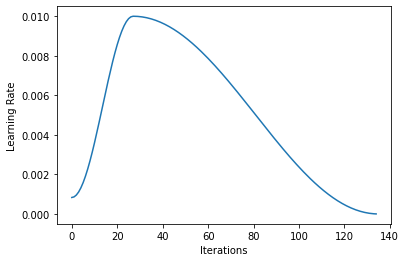

In [44]:
learn.recorder.plot_lr()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


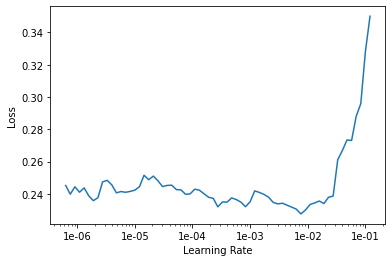

In [46]:
learn.recorder.plot()

In [47]:
learn.unfreeze()
learn.fit_one_cycle(25, max_lr=slice(3e-4,3e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.346634,0.783736,0.728814,00:04
1,0.325878,1.031530,0.750000,00:04
2,0.366248,1.923169,0.673729,00:05
3,0.417562,1.330703,0.716102,00:04
4,0.441210,2.018308,0.716102,00:04
5,0.491320,1.559748,0.750000,00:04
6,0.534667,2.238291,0.720339,00:04
7,0.545577,6.220332,0.449153,00:04
8,0.536881,3.083432,0.648305,00:04
9,0.545870,4.642009,0.572034,00:04


In [48]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

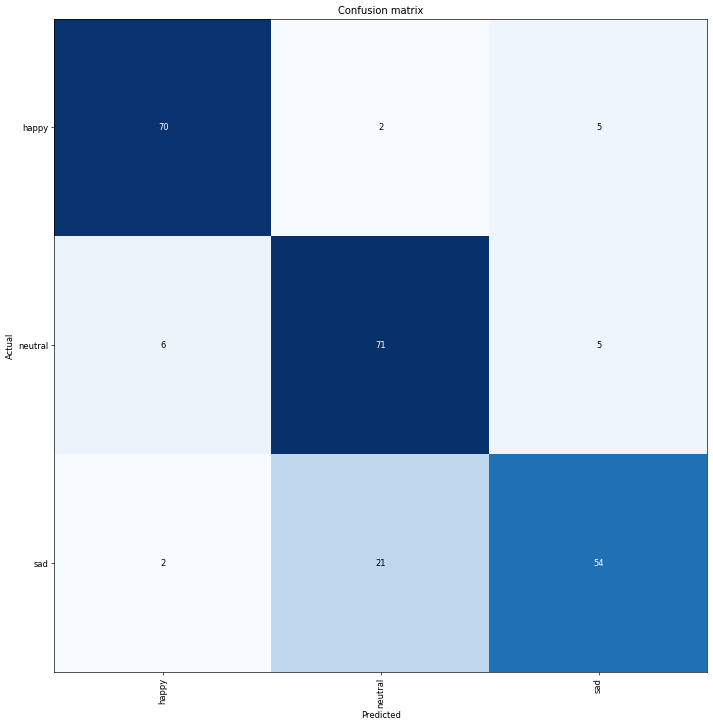

In [49]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
learn.show_results()

In [28]:
data_test = ImageDataBunch.from_folder(path, train="train", valid='test',
        ds_tfms=get_transforms(), num_workers=4).normalize(imagenet_stats)

In [29]:
learn.validate(data_test.valid_dl)

[1.1587721, tensor(0.7500)]